In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tqdm.auto import tqdm

from simulator import *

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
timer = Timer()

In [5]:
relative_cache_size = 0.3

catalog_size = 100
cache_size = int(relative_cache_size*catalog_size)
sample_size = 200000

In [6]:
trace = gen_irm_trace(sample_size, catalog_size, power_law_exp=0.8)

In [7]:
cache_init = init_cache(cache_size, catalog_size)

cache_LRU = LRU(cache_size, catalog_size, cache_init)
cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
cache_OGA = OGA(cache_size, catalog_size, sample_size, cache_init)
cache_DiscreteOGA = DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
cache_FTPL = FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)

DiscreteOGA_init = lambda cache_size, catalog_size, cache_init: DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
FTPL_init =  lambda cache_size, catalog_size, cache_init: FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
voting_expert_policies = (LRU, FTPL_init, DiscreteOGA_init)
cache_voting_experts = VotingExperts(cache_size, catalog_size, cache_init, voting_expert_policies)

RankOGA_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, cache_init, sample_size=sample_size)
RankFTPL_init = lambda cache_size, catalog_size, cache_init : RankFTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
ranking_expert_policies = (RankLRU, RankFTPL_init, RankOGA_init)
cache_ranking_experts = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=False)
cache_ranking_experts_mix = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=True)

In [8]:
caches = (cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH)
caches = simulate_caches_parallel(caches, trace)
# save_caches(caches, f"./figures/irm_caches_{relative_cache_size}.pickle")
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

  0%|          | 0/9 [00:00<?, ?it/s]

Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 297, in _bootstrap
    self.run()
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/koen/anaconda3/lib/python3.7/site-packages/multiprocess/process.py", line 99, in run
    self._target(*self._

In [ ]:
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

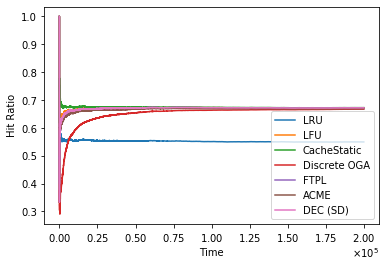

In [9]:
# %matplotlib ipympl
%matplotlib inline
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
#           cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
         )

In [6]:
trace = random_replacement_model(sample_size, catalog_size, power_law_exp=0.8, shuffled=False, replacement_rate=4)

In [15]:
cache_init = init_cache(cache_size, catalog_size)

cache_LRU = LRU(cache_size, catalog_size, cache_init)
cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
cache_OGA = OGA(cache_size, catalog_size, sample_size, cache_init)
cache_DiscreteOGA = DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
cache_FTPL = FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)

DiscreteOGA_init = lambda cache_size, catalog_size, cache_init: DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
FTPL_init =  lambda cache_size, catalog_size, cache_init: FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
voting_expert_policies = (LRU, FTPL_init, DiscreteOGA_init)
cache_voting_experts = VotingExperts(cache_size, catalog_size, cache_init, voting_expert_policies)

RankOGA_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, cache_init, sample_size=sample_size)
RankFTPL_init = lambda cache_size, catalog_size, cache_init : RankFTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
ranking_expert_policies = (RankLRU, RankFTPL_init, RankOGA_init)
cache_ranking_experts = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=False, eps=0.1 )
cache_ranking_experts_mix = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=True, eps=0.1)

In [16]:
caches = (cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH)
caches = simulate_caches_parallel(caches, trace)
# save_caches(caches, f"./figures/rrm_caches_{relative_cache_size}.pickle")
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

  0%|          | 0/9 [00:00<?, ?it/s]

In [18]:
%matplotlib ipympl
cache_ranking_experts.plot_expert_weights()
plt.yscale("log")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/koen/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)
/home/koen/anaconda3/lib/python3.7/site-packages/ipympl/backend_nbagg.py:180: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.manager.handle_json(content)


In [12]:
%matplotlib ipympl
# %matplotlib inline
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
#           cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
          cache_ranking_experts_mix,\
         )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
trace, catalog_size, sample_size = parse_trace(load_mat_array(r"./traces/yt_trace.mat"))

cache_size = int(relative_cache_size*catalog_size)

In [17]:
cache_init = init_cache(cache_size, catalog_size)

cache_LRU = LRU(cache_size, catalog_size, cache_init)
cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
cache_OGA = OGA(cache_size, catalog_size, sample_size, cache_init)
cache_DiscreteOGA = DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
cache_FTPL = FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)

DiscreteOGA_init = lambda cache_size, catalog_size, cache_init: DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
FTPL_init =  lambda cache_size, catalog_size, cache_init: FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
voting_expert_policies = (LRU, FTPL_init, DiscreteOGA_init)
cache_voting_experts = VotingExperts(cache_size, catalog_size, cache_init, voting_expert_policies)

RankOGA_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, cache_init, sample_size=sample_size)
RankFTPL_init = lambda cache_size, catalog_size, cache_init : RankFTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
ranking_expert_policies = (RankLRU, RankFTPL_init, RankOGA_init)
cache_ranking_experts = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=False)
cache_ranking_experts_mix = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=True)

In [18]:
caches = (cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH)
caches = simulate_caches_parallel(caches, trace)
save_caches(caches, f"./figures/yt_caches_{relative_cache_size}.pickle")
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

  0%|          | 0/9 [00:00<?, ?it/s]

/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


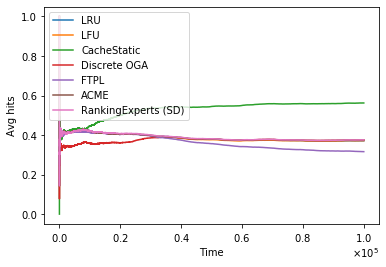

In [19]:
# %matplotlib ipympl
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
#           cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
         )

In [10]:
trace = get_movielens_trace()

sample_size, catalog_size = get_trace_stats(trace)
cache_size = int(relative_cache_size*catalog_size)

In [11]:
cache_init = init_cache(cache_size, catalog_size)

cache_LRU = LRU(cache_size, catalog_size, cache_init)
cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
cache_OGA = OGA(cache_size, catalog_size, sample_size, cache_init)
cache_DiscreteOGA = DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
cache_FTPL = FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)

DiscreteOGA_init = lambda cache_size, catalog_size, cache_init: DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
FTPL_init =  lambda cache_size, catalog_size, cache_init: FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
voting_expert_policies = (LRU, FTPL_init, DiscreteOGA_init)
cache_voting_experts = VotingExperts(cache_size, catalog_size, cache_init, voting_expert_policies)

RankOGA_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, cache_init, sample_size=sample_size)
RankFTPL_init = lambda cache_size, catalog_size, cache_init : RankFTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
ranking_expert_policies = (RankLRU, RankFTPL_init, RankOGA_init)
cache_ranking_experts = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=False)
cache_ranking_experts_mix = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=True)

In [12]:
caches = (cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH)
caches = simulate_caches(caches, trace)
# save_caches(caches, f"./figures/movielens_caches_{relative_cache_size}.pickle")
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

  0%|          | 0/1000209 [00:00<?, ?it/s]

KeyboardInterrupt: 

/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


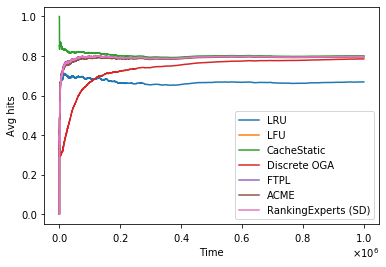

In [23]:
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
#           cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
         )

In [24]:
catalog_size = 100
cache_size = int(relative_cache_size*catalog_size)
sample_size = 800000

rrm_trace1 = random_replacement_model(sample_size//4, catalog_size, power_law_exp=0.8, shuffled=True, replacement_rate=10)
rrm_trace2 = random_replacement_model(sample_size//4, catalog_size, power_law_exp=0.8, shuffled=True, replacement_rate=1000)
rrm_trace3 = random_replacement_model(sample_size//4, catalog_size, power_law_exp=0.8, shuffled=True, replacement_rate=10)
rrm_trace4 = random_replacement_model(sample_size//4, catalog_size, power_law_exp=0.8, shuffled=True, replacement_rate=1000)

trace = combine_trace(rrm_trace1, rrm_trace2, rrm_trace3, rrm_trace4)

In [25]:
cache_init = init_cache(cache_size, catalog_size)

cache_LRU = LRU(cache_size, catalog_size, cache_init)
cache_LFU = LFU(cache_size, catalog_size, cache_init)
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))
cache_OGA = OGA(cache_size, catalog_size, sample_size, cache_init)
cache_DiscreteOGA = DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
cache_FTPL = FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)

DiscreteOGA_init = lambda cache_size, catalog_size, cache_init: DiscreteOGA(cache_size, catalog_size, sample_size, cache_init)
FTPL_init =  lambda cache_size, catalog_size, cache_init: FTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
voting_expert_policies = (LRU, FTPL_init, DiscreteOGA_init)
cache_voting_experts = VotingExperts(cache_size, catalog_size, cache_init, voting_expert_policies)

RankOGA_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, cache_init, sample_size=sample_size)
RankFTPL_init = lambda cache_size, catalog_size, cache_init : RankFTPL(cache_size, catalog_size, cache_init, sample_size=sample_size)
ranking_expert_policies = (RankLRU, RankFTPL_init, RankOGA_init)
cache_ranking_experts = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=False)
cache_ranking_experts_mix = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies,alg="SD", mixing=True)

In [26]:
caches = (cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH)
caches = simulate_caches_parallel(caches, trace)
save_caches(caches, f"./figures/rrm_multiple_caches_{relative_cache_size}.pickle")
(cache_ranking_experts, cache_ranking_experts_mix, cache_voting_experts, cache_OGA, cache_DiscreteOGA, cache_FTPL, cache_LRU, cache_LFU, cache_BH) = caches

  0%|          | 0/9 [00:00<?, ?it/s]

/home/koen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


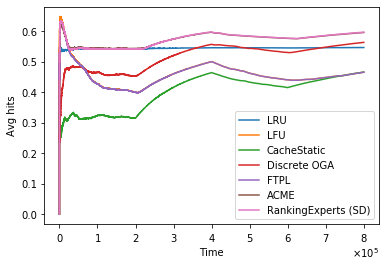

In [28]:
plot_comp(\
          cache_LRU,\
          cache_LFU,\
          cache_BH,\
#           cache_OGA,\
          cache_DiscreteOGA,\
          cache_FTPL,\
          cache_voting_experts,\
          cache_ranking_experts,\
         )
# plt.ylim([0, 0.5])